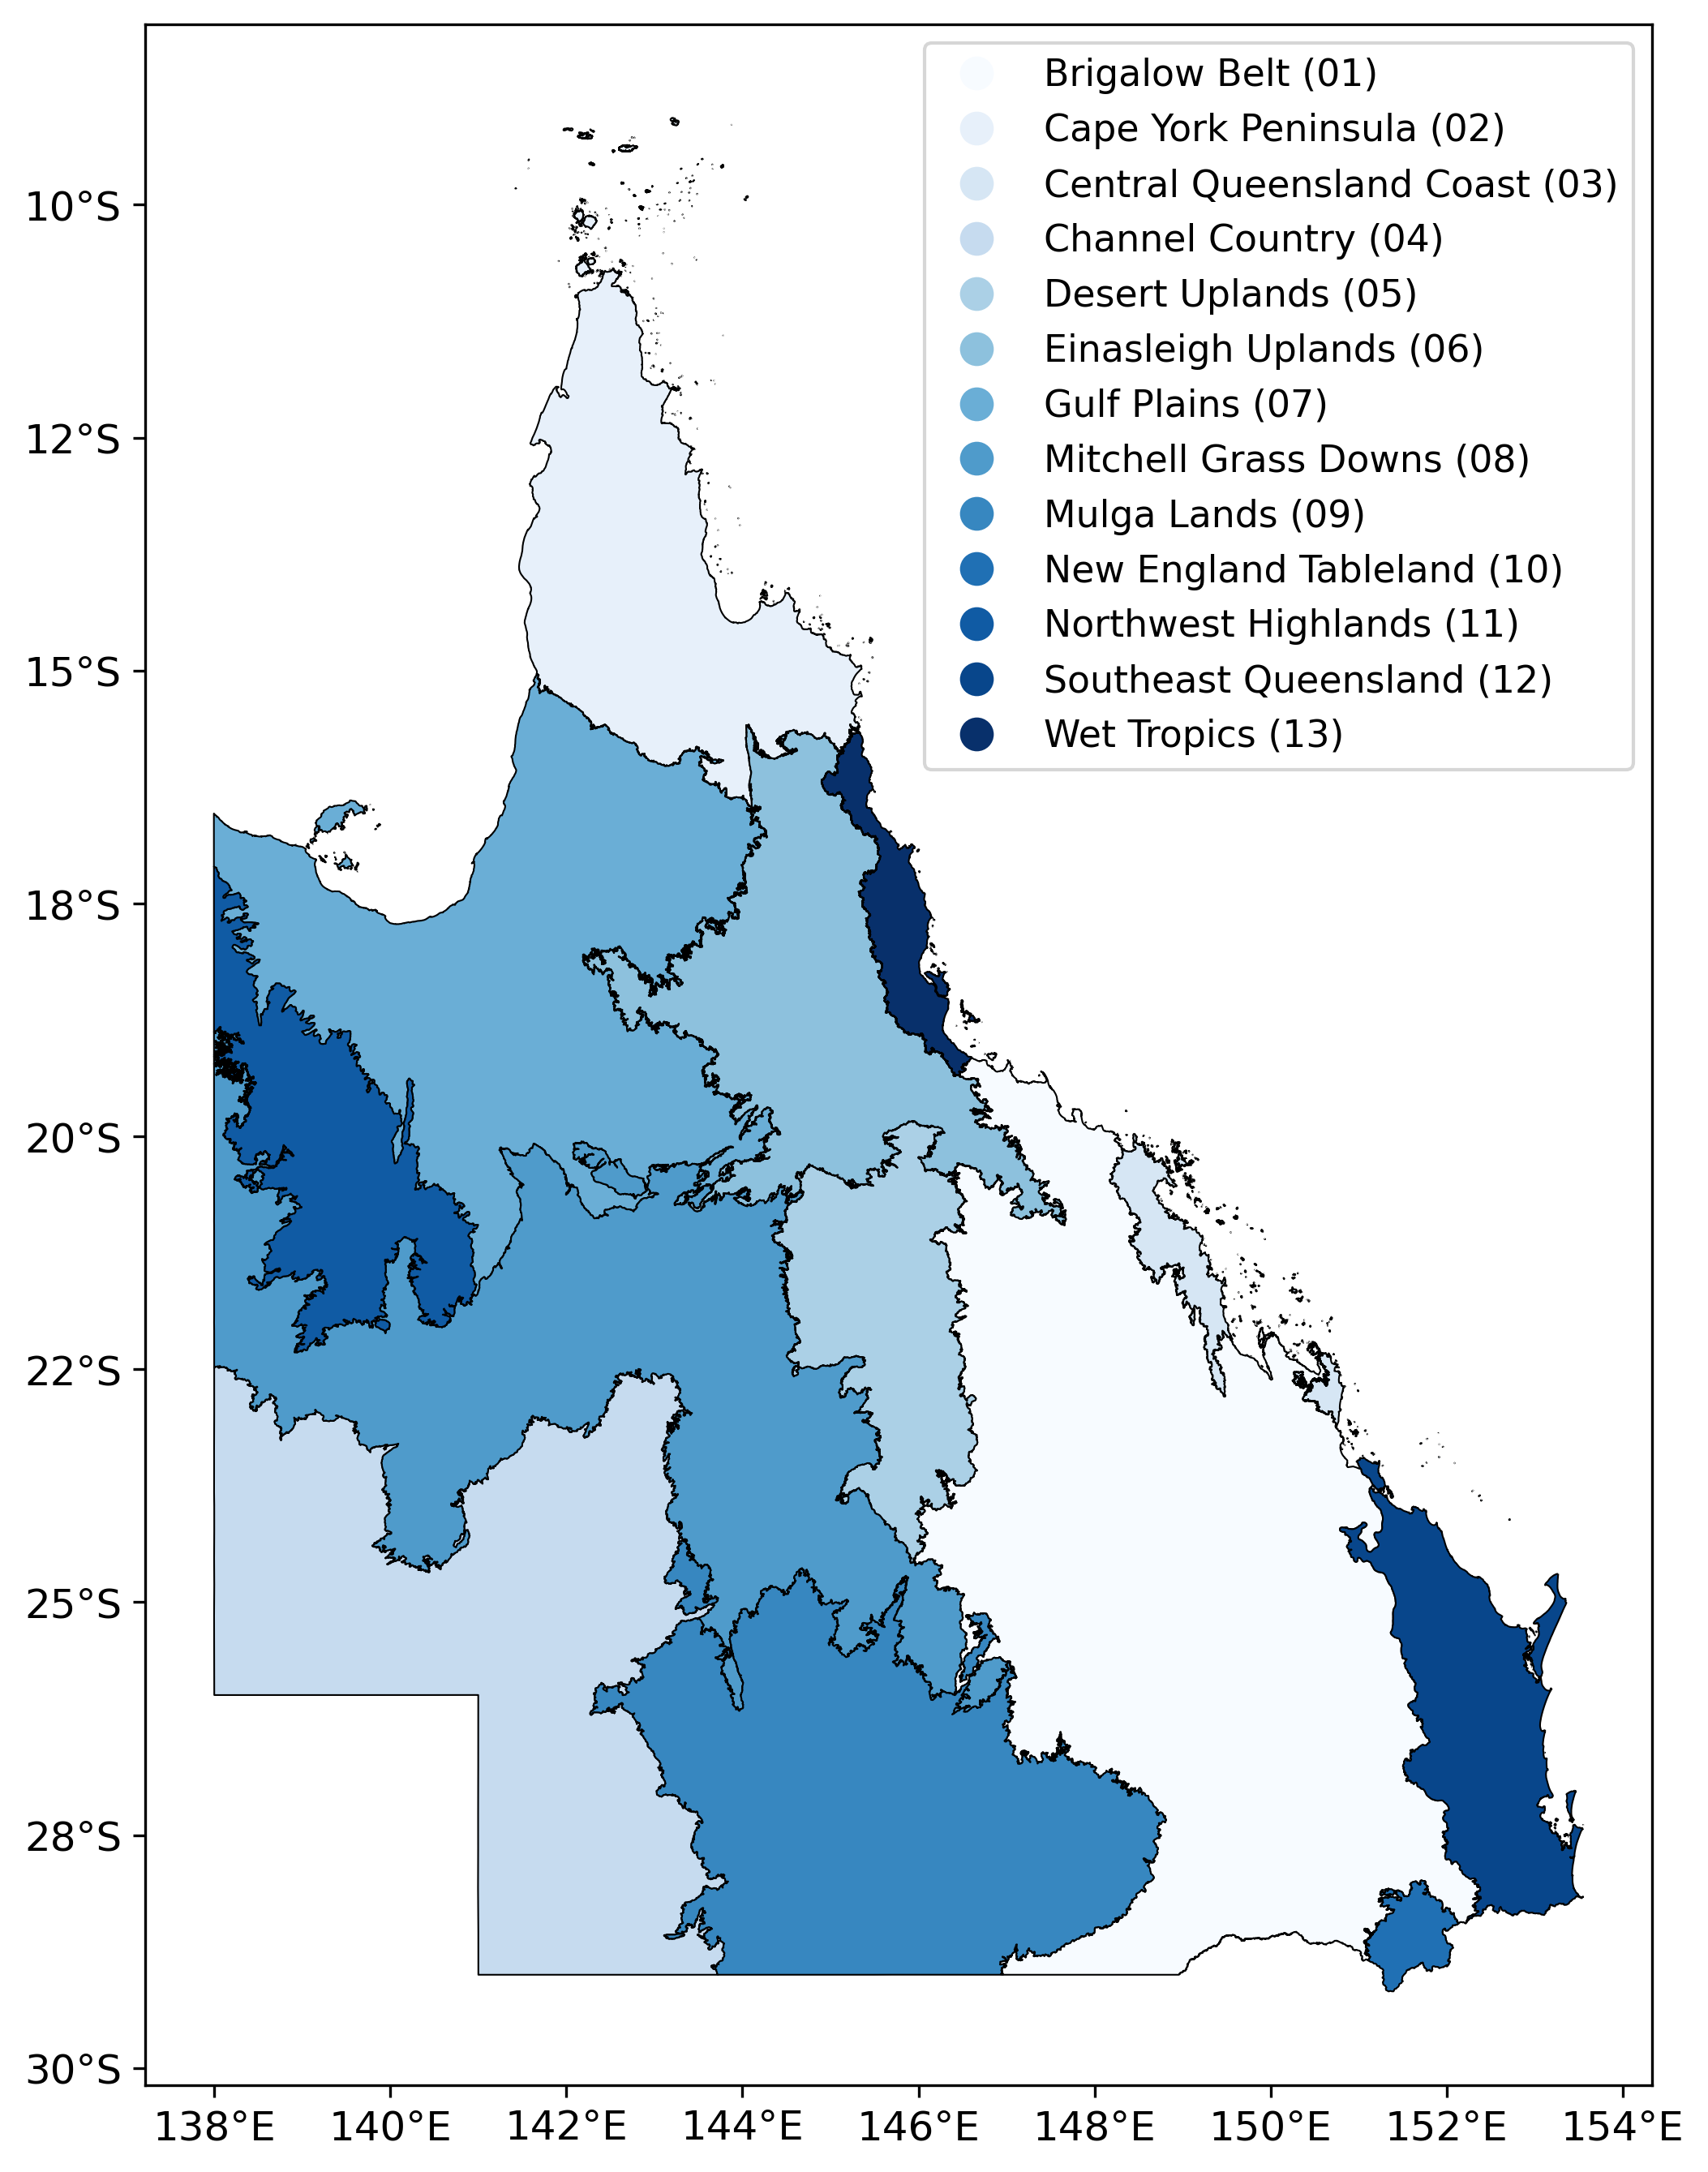

In [2]:
import pandas as pd
import geopandas as gpd
import glob
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

geojson_folder = "Data\\QLD Bio Regions\\QLD_BioRegions_Separated"

geojson_files = glob.glob(f"{geojson_folder}/*.geojson")
bioregions = [gpd.read_file(file) for file in geojson_files]
combined_gdf = gpd.GeoDataFrame(pd.concat(bioregions, ignore_index=True))

# Create numbered legend labels
unique_regions = sorted(combined_gdf['q_reg_name'].unique())
region_map = {
    name: f"{name} ({i+1:02d})"
    for i, name in enumerate(unique_regions)
}
combined_gdf['q_reg_label'] = combined_gdf['q_reg_name'].map(region_map)

fig, ax = plt.subplots(figsize=(12, 11), dpi=300)

combined_gdf.plot(
    ax=ax,
    column='q_reg_label',
    cmap='Blues',
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    legend_kwds={
        'fontsize': 11,
        'title_fontsize': 10
    }
)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{abs(x):.0f}°E"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f"{abs(y):.0f}°S"))
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()
